# Clustering Analysis

As we approach to the last step of exploring this basketball player dataset, I am going to use unsupervised learning methods to cluster the players into categories that can better summarizes the unique characters of its members. 

Lets first start by loading the python libraries.

In [636]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import cluster as skc
import sklearn as skl
import sklearn.preprocessing
%matplotlib inline
import csv

### Create numerical version of the dataset
I will continue to use the cleansed version of player season data, and I will create an all numerical version of it by removing string columns for following reasons.

1. String columns include player names, player team, player positions, among these player name does not effect the performance of player. Player team can affect player performance due to the game style for each team, but consider the fact that the game style is very much determined by the coach, which is highly inconsistent throughout the time, therefore the player team column will also not be considered. The other non-numerical attribute is player position, which is the traditional way of categorizing player characteristics, but since our purpose is to redefine a way to categorize players, so we do not have to include this column.
2. For computational purpose, only numerical data can be the function input.

In [638]:
with open('data/Seasons_Stats_cleansed.csv') as csvfile:
    reader1 = csv.reader(csvfile)
data = pd.read_csv('data/Seasons_Stats_cleansed.csv',sep='\t')

str_list = [] # empty list to contain columns with strings
for colname, colvalue in data.iteritems():
    if type(colvalue[1]) == str:
        str_list.append(colname)
#Get to the numeric columns by inversion
data_num_list = data.columns.difference(str_list)
data_num = data[data_num_list]

IOError: [Errno 2] No such file or directory: 'data/Seasons_Stats_cleansed.csv'

Both the original dataset and all numerical dataset will be divided into four subsets according to time period.

#### -  Subdivide original dataset

In [ ]:
pre90s_all = data[~(data['Year']>1989)]
_90s_all = data[~(data['Year']<1990) & ~(data['Year']>1999)]
_00s_all = data[~(data['Year']<2000) & ~(data['Year']>2009)]
_10s_all = data[~(data['Year']<2010)]

#### - Subdivide numerical dataset

In [ ]:
pre90s = data_num[~(data_num['Year']>1989)]
_90s = data_num[~(data_num['Year']<1990) & ~(data_num['Year']>1999)]
_00s = data_num[~(data_num['Year']<2000) & ~(data_num['Year']>2009)]
_10s = data_num[~(data_num['Year']<2010)]

Since we want to observe the changing behavior of basketball throughout time, I will choose the two subsets have the largest time gap in between, which is pre90(players data before 1990) and _10s(players since 2010).

### Normalize numerical dataset

The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values. Since the column features of our dataset have different ranges, such as the range of scoring points is from 0 to 30+, and for height and weight is even larger, but for other features like number of blocks or steal, the range tends to be much smaller. So in order to prevent the bias of the predicative model towards feature with higher number, we have to normalize the dataset. 

In [ ]:
from sklearn.preprocessing import StandardScaler
pre90s_z = StandardScaler().fit_transform(pre90s)
_90s_z = StandardScaler().fit_transform(_90s)
_00s_z = StandardScaler().fit_transform(_00s)
_10s_z = StandardScaler().fit_transform(_10s)

### Feature analysis with PCA

In order to do so, we will first perform PCA implementation that comes with Python's sklearn machine learning library.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(pre90s_z)

This gives us an object we can use to transform our data by calling transform.

In [ ]:
pre90s_existing_nd = pca.transform(pre90s_z)

In [ ]:
pre90s_existing_df_nd = pd.DataFrame(pre90s_existing_nd)
pre90s_existing_df_nd.index = pre90s.index
pre90s_existing_df_nd.columns = pre90s.columns
pre90s_existing_df_nd.head()

In [ ]:
print(pca.explained_variance_ratio_) 
pre90s_cum_var_exp = np.cumsum(pca.explained_variance_ratio_)

In [ ]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(pre90s_cum_var_exp)), pre90s_cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

Repeat the same steps for the other dataset.

In [ ]:
pca.fit(_90s_z)
_90s_existing_nd = pca.transform(_90s_z)
_90s_existing_df_nd = pd.DataFrame(_90s_existing_nd)
_90s_existing_df_nd.index = _90s.index
_90s_existing_df_nd.columns = _90s.columns
_90s_existing_df_nd.head()

In [ ]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
_90s_cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 5))
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(_90s_cum_var_exp)), _90s_cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [ ]:
pca.fit(_00s_z)
_00s_existing_nd = pca.transform(_00s_z)
_00s_existing_df_nd = pd.DataFrame(_00s_existing_nd)
_00s_existing_df_nd.index = _00s.index
_00s_existing_df_nd.columns = _00s.columns
_00s_existing_df_nd.head()

In [ ]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
_00s_cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 5))
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(_00s_cum_var_exp)), _00s_cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [ ]:
pca.fit(_10s_z)
_10s_existing_nd = pca.transform(_10s_z)
_10s_existing_df_nd = pd.DataFrame(_10s_existing_nd)
_10s_existing_df_nd.index = _10s.index
_10s_existing_df_nd.columns = _10s.columns
_10s_existing_df_nd.head()

With these two simplied dataset with reduced dimension of 6, we can explore the different choices of number for clustering. I will keep the options open from 2 to 20.

In [ ]:
from sklearn.cluster import KMeans

SS = []

for i in range(2,20):
    km = KMeans(n_clusters = i)
    km.fit(pre90s_existing_df_nd)
    SS.append(km.inertia_)
    
plt.plot(range(2,20), SS)
plt.xlabel('Number of Clusters')
plt.ylabel('SS Value')
plt.show()

In [ ]:

'''
SS = []

for i in range(2,20):
    km = KMeans(n_clusters = i)
    km.fit(_90s_existing_df_nd)
    SS.append(km.inertia_)
    
plt.plot(range(2,20), SS)
plt.xlabel('Number of Clusters')
plt.ylabel('SS Value')
plt.show()
'''

In [ ]:
'''
SS = []

for i in range(2,20):
    km = KMeans(n_clusters = i)
    km.fit(_00s_existing_df_nd)
    SS.append(km.inertia_)
    
plt.plot(range(2,20), SS)
plt.xlabel('Number of Clusters')
plt.ylabel('SS Value')
plt.show()
'''

By using the albew method, we can tell starting from 7, the SS value kind of stop decreasing as rapidly as before, so I will choose 7 as the number of clusters.

In [ ]:
SS = []

for i in range(2,20):
    km = KMeans(n_clusters = i)
    km.fit(_10s_existing_df_nd)
    SS.append(km.inertia_)
    
plt.plot(range(2,20), SS)
plt.xlabel('Number of Clusters')
plt.ylabel('SS Value')
plt.show()

For the 10s dataset, we can tell more clearly that starting from 7, the SS value stop decreasing so rapidly, so I will also choose 7 as the number of clusters.

In [ ]:
import scipy
from scipy.cluster.vq import vq, kmeans, whiten
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq

#changing x_z from dataframe to an array
pre90s_z1 = np.array(pre90s_existing_df_nd)

##kmeans clustering for 7 clusters
pre90s_kmeans_x,_ = kmeans(pre90s_z1,7)
#print(pre90s_kmeans_x)

In [ ]:
_90s_z1 = np.array(_90s_existing_df_nd)
_90s_kmeans_x,_ = kmeans(_90s_z1,7)
_00s_z1 = np.array(_00s_existing_df_nd)
_00s_kmeans_x,_ = kmeans(_00s_z1,7)
_10s_z1 = np.array(_10s_existing_df_nd)
_10s_kmeans_x,_ = kmeans(_10s_z1,7)
#print(_10s_kmeans_x)

To see, if the PCA algorithm will be able to separate the clusters, I am adding clusters from (k =7) to the original dataframe. Then I will plot the scatterplot of PC1 vs PC2, which are the two most prominent ones to see if the seven clusters separate as they should.

In [ ]:
pre90s_idx7,_ = vq(pre90s_z1,pre90s_kmeans_x)

In [ ]:
plt.figure(figsize=(20,20))
plt.plot(pre90s_z1[pre90s_idx7==0,0],pre90s_z1[pre90s_idx7==0,1],'sc',
     pre90s_z1[pre90s_idx7==1,0],pre90s_z1[pre90s_idx7==1,1],'sr',
     pre90s_z1[pre90s_idx7==2,0],pre90s_z1[pre90s_idx7==2,1],'om',
     pre90s_z1[pre90s_idx7==3,0],pre90s_z1[pre90s_idx7==3,1],'ob',
     pre90s_z1[pre90s_idx7==4,0],pre90s_z1[pre90s_idx7==4,1],'ok',
     pre90s_z1[pre90s_idx7==5,0],pre90s_z1[pre90s_idx7==5,1],'sg',
     pre90s_z1[pre90s_idx7==6,0],pre90s_z1[pre90s_idx7==6,1],'oy')
plt.plot(pre90s_kmeans_x[:,0],pre90s_kmeans_x[:,1],'sy',markersize=1)
plt.xlim(-15.0, 15.0)
plt.ylim(-15.0, 15.0)
show()


The 7 clusters are very clear for the pre90s dataset.

In [ ]:
_10s_idx7,_ = vq(_10s_z1,_10s_kmeans_x)
plt.figure(figsize=(20,20))
plt.plot(_10s_z1[_10s_idx7==0,0],_10s_z1[_10s_idx7==0,1],'sc',
     _10s_z1[_10s_idx7==1,0],_10s_z1[_10s_idx7==1,1],'sr',
     _10s_z1[_10s_idx7==2,0],_10s_z1[_10s_idx7==2,1],'om',
     _10s_z1[_10s_idx7==3,0],_10s_z1[_10s_idx7==3,1],'ob',
     _10s_z1[_10s_idx7==4,0],_10s_z1[_10s_idx7==4,1],'ok',
     _10s_z1[_10s_idx7==5,0],_10s_z1[_10s_idx7==5,1],'sg',
     _10s_z1[_10s_idx7==6,0],_10s_z1[_10s_idx7==6,1],'oy')
plt.plot(_10s_kmeans_x[:,0],_10s_kmeans_x[:,1],'sy',markersize=8)
plt.xlim(-15.0, 15.0)
plt.ylim(-15.0, 15.0)
show()

The 7 clusters are very distinguishable for the _10s dataset.

# Intepretation of clusters

## For pre 1990 data

In [634]:
pre90s_cluster = pre90s_idx7
#type(pre90s_cluster)
type(pre90s_all)
#type(pre90s_z)

pandas.core.frame.DataFrame

#### Inteprate through normalized dataset

Since in normalized dataset all the attributes are scaled to the same range, and the relative difference are also scaled to the same range, which makes it easy to have visual comparison.

In [635]:
pre90s_z = pd.DataFrame(pre90s_z)
pre90s_z.index = pre90s.index
pre90s_z.columns = pre90s.columns

##Add the cluster membership to first dataframe x
pre90s_z['cluster_ID'] = pre90s_cluster[:]
pre90s_z_cluster_sort = pre90s_z.sort_values('cluster_ID')

## Sort the players by cluster membership
cluster1 = pre90s_z_cluster_sort.loc[pre90s_z_cluster_sort["cluster_ID"] == 0]
cluster2 = pre90s_z_cluster_sort.loc[pre90s_z_cluster_sort["cluster_ID"] == 1]
cluster3 = pre90s_z_cluster_sort.loc[pre90s_z_cluster_sort["cluster_ID"] == 2]
cluster4 = pre90s_z_cluster_sort.loc[pre90s_z_cluster_sort["cluster_ID"] == 3]
cluster5 = pre90s_z_cluster_sort.loc[pre90s_z_cluster_sort["cluster_ID"] == 4]
cluster6 = pre90s_z_cluster_sort.loc[pre90s_z_cluster_sort["cluster_ID"] == 5]
cluster7 = pre90s_z_cluster_sort.loc[pre90s_z_cluster_sort["cluster_ID"] == 6]

#calculate mean values for each clusters
c1means = pd.DataFrame(cluster1.mean())
c2means = pd.DataFrame(cluster2.mean())
c3means = pd.DataFrame(cluster3.mean())
c4means = pd.DataFrame(cluster4.mean())
c5means = pd.DataFrame(cluster5.mean())
c6means = pd.DataFrame(cluster6.mean())
c7means = pd.DataFrame(cluster7.mean())

summary = pd.concat([c1means, c2means, c3means, c4means, c5means, c6means, c7means], axis=1, join_axes = [c1means.index])
 
## Assign column names to the dataframe summary
summary.columns = ['Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5', 'Cluster_6', 'Cluster_7']

summary_feature1 = summary.loc[['height','weight']]
summary_feature1 = summary_feature1.transpose()
plt.figure()
summary_feature1.plot(kind ='bar')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) ## to move the legend outside of plot
plt.show()

ValueError: Length mismatch: Expected axis has 51 elements, new values have 50 elements

#### large players: Cluster_2, Cluster_6, Cluster_7
#### medium players: Cluster_5
#### small players: Cluster_1, Cluster_3, Cluster_4

In [601]:
summary_feature2 = summary.loc[['PTS','AST','TRB','STL','BLK','PF']]
summary_feature2 = summary_feature2.transpose()

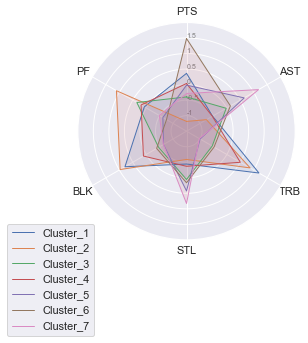

In [602]:
from math import pi

# ------- PART 1: Create background
 
# number of variable
categories=list(summary_feature2)[0:]
N = len(categories) 
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([-1,-0.5,0,0.5,1,1.5], ["-1","-0.5","0","0.5","1","1.5"], color="grey", size=7)
plt.ylim(-1.5,2.0)
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=summary_feature2.loc['Cluster_1'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_1")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=summary_feature2.loc['Cluster_2'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_2")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=summary_feature2.loc['Cluster_3'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_3")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind4
values=summary_feature2.loc['Cluster_4'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_4")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind5
values=summary_feature2.loc['Cluster_5'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_5")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind6
values=summary_feature2.loc['Cluster_6'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_6")
ax.fill(angles, values, 'r', alpha=0.1)

 
# Ind7
values=summary_feature2.loc['Cluster_7'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_7")
ax.fill(angles, values, 'r', alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))


#### Cluster_1: small players average in all areas
#### Cluster_2: big players relatively strong in scoring, particularly strong in getting rebounds and blocks
#### Cluster_3: small players relatively strong in assist and steal
#### Cluster_4: small players particularly strong in assist and steal
#### Cluster_5: medium players particularly strong in scoring
#### Cluster_6: big players average in all areas
#### Cluster_7: big players particularly strong in block and rebound, getting fouls

In [603]:
summary_feature3 = summary.loc[['2P','2P%','3P','3P%','FT','FT%']]
summary_feature3 = summary_feature3.transpose()

['2P', '2P%', '3P', '3P%', 'FT', 'FT%']
[0.0, 1.0471975511965976, 2.0943951023931953, 3.141592653589793, 4.1887902047863905, 5.235987755982989, 0.0]


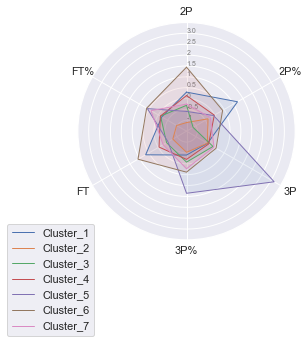

In [604]:
from math import pi

# ------- PART 1: Create background
 
# number of variable
categories=list(summary_feature3)[0:]
N = len(categories) 
print(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

print(angles)
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([-1,-0.5,0,0.5,1,1.5,2,2.5,3.0], ["-1","-0.5","0","0.5","1","1.5","2","2.5","3.0"], color="grey", size=7)
plt.ylim(-1.5,3.5)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=summary_feature3.loc['Cluster_1'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_1")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=summary_feature3.loc['Cluster_2'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_2")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=summary_feature3.loc['Cluster_3'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_3")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind4
values=summary_feature3.loc['Cluster_4'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_4")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind5
values=summary_feature3.loc['Cluster_5'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_5")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind6
values=summary_feature3.loc['Cluster_6'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_6")
ax.fill(angles, values, 'r', alpha=0.1)

 
# Ind7
values=summary_feature3.loc['Cluster_7'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_7")
ax.fill(angles, values, 'r', alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))


#### Cluster_1: small players who don't shoot much, average in all areas
#### Cluster_2: big players who's relatively strong at mid-range and drawing free throws, particularly strong in getting rebounds and blocks
#### Cluster_3: small players who particularly strong at distant-range, relatively strong in assist and steal
#### Cluster_4: small players have well rounded shooting options, particularly strong in assist and steal
#### Cluster_5: medium players particularly strong at mid-range and drawing free throws
#### Cluster_6: big players have well rounded shooting options, average in all areas
#### Cluster_7: big players who shoot very few, particularly strong in block and rebound, getting fouls

#### Inteprate through unnormalized dataset

Unnormalized dataset helps to see the real facts of attributes of each cluster.

In [605]:
pre90s_all['cluster_ID'] = pre90s_cluster[:]
pre90s_all_cluster_sort = pre90s_all.sort_values('cluster_ID')

/Users/yidingweng/anaconda3/envs/ai/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [606]:
cluster1 = pre90s_all_cluster_sort.loc[pre90s_all_cluster_sort["cluster_ID"] == 0]
cluster2 = pre90s_all_cluster_sort.loc[pre90s_all_cluster_sort["cluster_ID"] == 1]
cluster3 = pre90s_all_cluster_sort.loc[pre90s_all_cluster_sort["cluster_ID"] == 2]
cluster4 = pre90s_all_cluster_sort.loc[pre90s_all_cluster_sort["cluster_ID"] == 3]
cluster5 = pre90s_all_cluster_sort.loc[pre90s_all_cluster_sort["cluster_ID"] == 4]
cluster6 = pre90s_all_cluster_sort.loc[pre90s_all_cluster_sort["cluster_ID"] == 5]
cluster7 = pre90s_all_cluster_sort.loc[pre90s_all_cluster_sort["cluster_ID"] == 6]

Now, lets look at the characteristics of each cluster by calculating means of each clusters.

In [607]:
#calculate mean values for each clusters
c1means = pd.DataFrame(cluster1.mean())
c2means = pd.DataFrame(cluster2.mean())
c3means = pd.DataFrame(cluster3.mean())
c4means = pd.DataFrame(cluster4.mean())
c5means = pd.DataFrame(cluster5.mean())
c6means = pd.DataFrame(cluster6.mean())
c7means = pd.DataFrame(cluster7.mean())

In [608]:
##Concatenate the seven dataframes along axis =1 using the index from c1means
summary = pd.concat([c1means, c2means, c3means, c4means, c5means, c6means, c7means], axis=1, join_axes = [c1means.index])

## Assign column names to the dataframe summary
summary.columns = ['Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5', 'Cluster_6', 'Cluster_7']
print(summary)

                Cluster_1    Cluster_2    Cluster_3    Cluster_4    Cluster_5  \
Unnamed: 0    4815.007143  4859.462882  4744.617363  4601.257235  5521.494444   
Unnamed: 0.1  7316.802381  7381.993450  7217.745981  7008.811897  8349.483333   
Year          1983.771429  1983.984716  1983.485531  1982.967846  1986.588889   
Age             26.461905    27.000000    25.379421    25.987138    27.261111   
G               76.447619    67.805677    55.900322    72.379421    71.155556   
MP            2247.997619  1238.281659   754.340836  1752.635048  1730.594444   
PER              0.298274     0.356920     0.526591     0.319060     0.331114   
TS%              0.583452     0.503306     0.469254     0.523108     0.531828   
3PAr             0.005976     0.007860     0.035479     0.010672     0.224683   
FTr              0.452214     0.362395     0.268370     0.317272     0.230311   
ORB%            10.150238     9.232969     5.267203     8.233119     3.194444   
DRB%            20.447143   

### Extra things to notice for each cluster:

#### Cluster_1: G(games played) and MP(minutes played) is signifcantly lower than other clusters
#### Cluster_2: one of the groups that are tallest and heaviest among all, and played longest time
#### Cluster_5: one of the group played longest time, has the highest USG%(usage rate), which means take the most percentage of team plays while he on the floor.
#### Cluster_7: one of the groups that are tallest and heaviest among all, but played shortest time

### Observation so far for pre1990s players

#### Cluster_1: small players who don't shoot much, have limited playing minutes
#### Cluster_2: big players who's relatively strong at mid-range and drawing free throws, particularly strong in getting rebounds and blocks, play long minutes
#### Cluster_3: small players who particularly strong at distant-range, relatively strong in assist and steal 
#### Cluster_4: small players have well rounded shooting options, particularly strong in assist and steal
#### Cluster_5: medium players particularly strong at mid-range and drawing free throws, take longest playing minutes, and most team plays
#### Cluster_6: big players have well rounded shooting options, average in all areas
#### Cluster_7: big players who shoot very few, particularly strong in block and rebound, getting fouls, have limited playing time

## Who are in each clusters

We can also understand the character of each cluster by selecting prominent players in each cluster. Here I use minutes played(MP) as the criteria for elite players, since usually the elite players are given more opportunites to carry the game. 

### 1. Well-rounded small players with limited playing time

In [609]:
cluster1.loc[cluster1['MP'] >= 1200]['Player'].unique()

array(['Kareem Abdul-Jabbar', 'Brad Daugherty', 'Terry Tyler',
       'Jerome Kersey', 'Jack Sikma', 'James Donaldson',
       'Jerome Whitehead', 'Steve Johnson', 'Dan Roundfield',
       'Tree Rollins', 'Buck Williams', 'Bill Robinzine', 'Gene Banks',
       'Dave Greenwood', 'A.C. Green', 'Artis Gilmore', 'Kenny Carr',
       'Billy Paultz', 'Bill Cartwright', 'Robert Parish', 'Tom Owens',
       'Patrick Ewing', 'Swen Nater', 'Steve Mix', 'Terry Cummings',
       'Mike Gminski', 'George McGinnis', 'Mychal Thompson',
       'Cedric Maxwell', 'Bill Laimbeer', 'Alton Lister', 'Bob Lanier',
       'Hakeem Olajuwon', 'Frank Brickowski', 'Alvan Adams',
       'Maurice Lucas', 'Larry Nance', 'Moses Malone', 'Michael Cage',
       'Kevin McHale', 'Calvin Natt', 'Kermit Washington', 'Rodney McCray',
       'Tim McCormick', 'Wes Unseld', 'Jeff Ruland', 'Karl Malone',
       'Tyrone Corbin', 'Cliff Levingston', 'Benoit Benjamin',
       'Darryl Dawkins', 'Herb Williams', 'Ed Nealy', 'James Ed

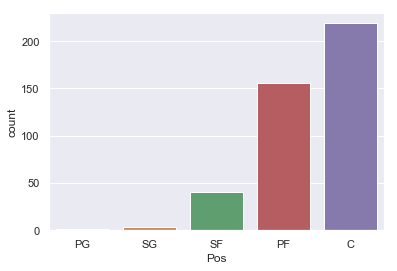

In [610]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="Pos", data=cluster1, order=["PG", "SG", "SF","PF","C"])

### 2. Elite big man with all traits

In [611]:
cluster2.loc[cluster2['MP'] >= 3000]['Player'].unique()

array(['Rick Mahorn'], dtype=object)

Since we also want to explore the relationship between the traditional way of clustering players which is according to the position, with our new method, I will also use bar plot to observe the distribution of player position within each cluster.

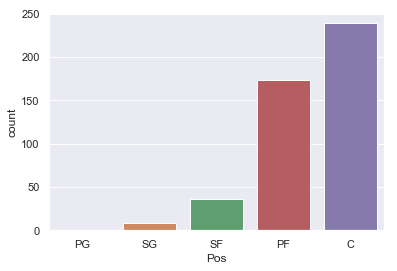

In [612]:
ax = sns.countplot(x="Pos", data=cluster2,order=["PG", "SG", "SF","PF","C"])

### 3. Distant range shooter

In [613]:
cluster3.loc[cluster3['MP'] >= 2500]['Player'].unique()

array([], dtype=object)

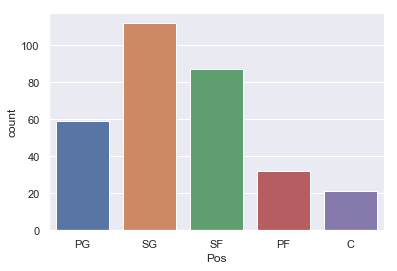

In [614]:
ax = sns.countplot(x="Pos", data=cluster3,order=["PG", "SG", "SF","PF","C"])

### 4. Small players with all traits

In [615]:
cluster4.loc[cluster4['MP'] >= 2600]['Player'].unique()

array(['Joe Barry', 'Rodney McCray', 'Xavier McDaniel', 'Jim Chones',
       'Dave Corzine', 'Mychal Thompson', 'Mike Bantom', 'Greg Ballard',
       'Terry Tyler', 'Elvin Hayes', 'Mickey Johnson', 'Truck Robinson',
       'Sam Perkins', 'Dave Greenwood', 'Ken Norman', 'Rick Mahorn',
       'Jack Sikma', 'Mike Mitchell', 'Reggie King', 'Charles Oakley',
       'Mike Gminski', 'Rudy Tomjanovich', 'Sonny Parker',
       'Nick Weatherspoon', 'Robert Reid', 'Lonnie Shelton',
       'Tom Chambers', 'Calvin Natt', 'Michael Brooks', 'Chuck Person',
       'Clark Kellogg', 'Kevin Duckworth', 'Larry Kenon', 'Dennis Johnson',
       'Jerome Kersey', 'Alex English', 'Cliff Robinson', 'Tom LaGarde',
       'T.R. Dunn', 'Toby Knight', 'Horace Grant'], dtype=object)

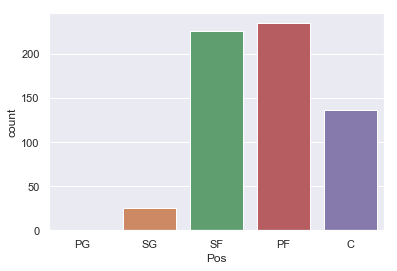

In [616]:
ax = sns.countplot(x="Pos", data=cluster4,order=["PG", "SG", "SF","PF","C"])

### 5. Middle man that carried the team

In [617]:
cluster5.loc[cluster5['MP'] >= 2800]['Player'].unique()

array(['Danny Ainge', 'Derek Harper', 'Chuck Person', 'Dale Ellis',
       'Sleepy Floyd', 'Terry Porter'], dtype=object)

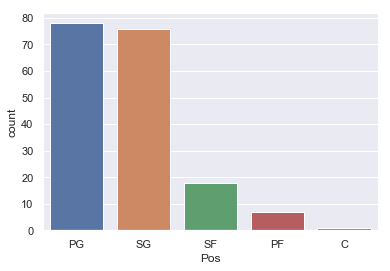

In [618]:
ax = sns.countplot(x="Pos", data=cluster5,order=["PG", "SG", "SF","PF","C"])

### 6. Well-rounded big man

In [619]:
cluster6.loc[cluster6['MP'] >= 2600]['Player'].unique()

array(['Mark Aguirre', 'Adrian Dantley', 'Reggie Theus', 'James Worthy',
       'Dominique Wilkins', 'Gerald Wilkins', 'Jerome Kersey',
       'Michael Jordan', 'David Thompson', 'Ray Williams', 'Jamaal Wilkes',
       'Scott Wedman', 'Magic Johnson', 'Orlando Woolridge', 'Larry Bird',
       'Alex English', 'Dan Issel', 'Dennis Johnson', 'Eddie Johnson',
       'George Gervin', 'Clyde Drexler', 'Bernard King', 'Terry Cummings',
       'Tom Chambers', 'Mike Mitchell', 'Julius Erving', 'Mike Newlin',
       'Jim Paxson', 'Darrell Griffith', 'Thurl Bailey', 'Greg Ballard',
       'Ron Harper', 'Joe Barry', 'Gus Williams', 'Dale Ellis',
       'Rolando Blackman', 'World B.', 'Walter Davis', 'Larry Drew',
       'Jay Vincent', 'Kiki Vandeweghe', 'Alvin Robertson', 'Isiah Thomas',
       'Johnny Davis', 'Kelly Tripucka', 'Fat Lever', 'Jeff Malone',
       'Xavier McDaniel', 'Sidney Moncrief', 'Bob Dandridge', 'M.L. Carr',
       'Reggie Lewis', 'Otis Birdsong', 'Brian Winters', 'Austin Carr

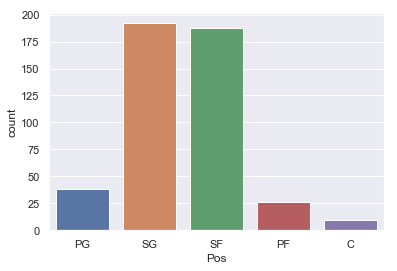

In [620]:
ax = sns.countplot(x="Pos", data=cluster6,order=["PG", "SG", "SF","PF","C"])

### 7. Defensive big man who does the phyical work

In [621]:
cluster7.loc[cluster7['MP'] >= 1900]['Player'].unique()

array(['Ricky Sobers', 'Bob Wilkerson', 'Otis Birdsong', 'Maurice Cheeks',
       'John Bagley', 'Lester Conner', 'Danny Ainge', 'Jo Jo',
       'Charlie Scott', 'Reggie Theus', 'M.L. Carr', 'Tiny Archibald',
       'Armond Hill', 'Terry Furlow', 'Rory Sparrow', 'John Stockton',
       'John Lucas', 'Allen Leavell', 'Doc Rivers', 'Eddie Jordan',
       'Kenny Smith', 'Jerry Sichting', 'John Johnson', 'Sleepy Floyd',
       'Vern Fleming', 'Phil Ford', 'Joe Dumars', 'Ennis Whatley',
       'Ron Brewer', 'Dudley Bradley', 'Ron Boone', 'Gus Williams',
       'Darwin Cook', 'Ray Williams', 'Henry Bibby', 'Rob Williams',
       'Don Buse', 'Larry Drew', 'Johnny Davis', 'Michael Cooper',
       'Randy Wittman', 'Kevin Porter', 'Fat Lever', 'Ron Lee',
       'Dennis Johnson', 'Brian Shaw', 'Lou Hudson', 'Lionel Hollins',
       'Jim McMillian', 'Alvin Robertson', 'Eric Money', 'Jim Thomas',
       'Wilbur Holland', 'Jim Price', 'Paul Pressey', 'Norm Nixon',
       'Earl Tatum', 'Tom Henderson

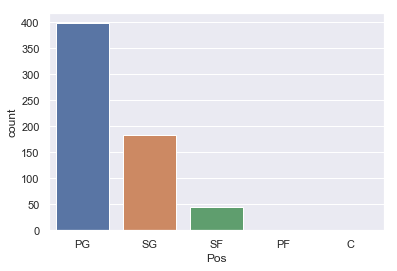

In [622]:
ax = sns.countplot(x="Pos", data=cluster7,order=["PG", "SG", "SF","PF","C"])

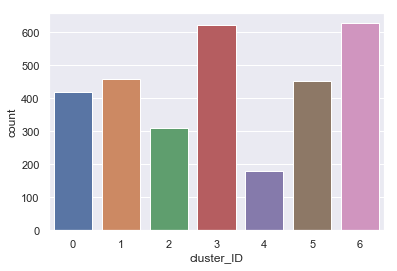

In [632]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="cluster_ID", data=pre90s_all_cluster_sort, order=[0, 1, 2, 3, 4, 5, 6])

In [627]:
pre90s_all_cluster_sort

,Unnamed: 0,Unnamed: 0.1,Year,Player,Pos,Age,Tm,G,MP,PER,...,TRB,AST,STL,BLK,TOV,PF,PTS,height,weight,cluster_ID
0,3218,5010,1978,Kareem Abdul-Jabbar,C,30,LAL,62,2265.0,0.464106,...,12.731126,4.275497,1.637086,2.940397,3.305960,2.892715,25.430464,218.0,102.0,0
2852,6081,9189,1989,Brad Daugherty,C,23,CLE,78,2821.0,0.236086,...,9.162708,3.637008,0.803970,0.510457,2.935129,2.233251,18.823112,213.0,111.0,0
1219,4442,6778,1982,Terry Tyler,PF,25,DET,82,1989.0,0.305882,...,8.923077,2.280543,1.393665,2.895928,2.190045,3.294118,14.751131,201.0,97.0,0
2391,5618,8472,1987,Jerome Kersey,SF,24,POR,82,2088.0,0.291379,...,8.551724,3.344828,2.103448,1.327586,2.568966,5.655172,17.396552,201.0,97.0,0
445,3664,5657,1979,Jack Sikma,C,23,SEA,82,2958.0,0.198377,...,12.328600,3.176471,0.997972,0.815416,3.079108,3.590264,15.590264,211.0,104.0,0
2857,6086,9200,1989,James Donaldson,C,31,DAL,53,1746.0,0.292784,...,11.752577,0.783505,0.494845,1.670103,1.711340,2.288660,9.917526,218.0,124.0,0
1230,4453,6792,1982,Jerome Whitehead,C,25,SDC,72,2214.0,0.271545,...,10.796748,1.658537,0.780488,0.715447,2.292683,4.715447,16.195122,208.0,99.0,0
2384,5610,8462,1987,Steve Johnson,C,29,POR,79,2345.0,0.231812,...,8.689126,2.379531,0.752239,1.166738,4.237100,5.219616,20.417910,203.0,99.0,0
436,3655,5643,1979,Dan Roundfield,PF,25,ATL,80,2539.0,0.275069,...,12.264671,1.857424,1.233557,2.495471,2.963371,5.076014,17.354864,203.0,92.0,0
435,3654,5642,1979,Tree Rollins,C,23,ATL,81,1900.0,0.327789,...,11.141053,0.928421,0.871579,4.812632,1.648421,6.214737,12.941053,216.0,106.0,0


## Repeat similar approach for post 2010 data

#### Inteprate through normalized dataset

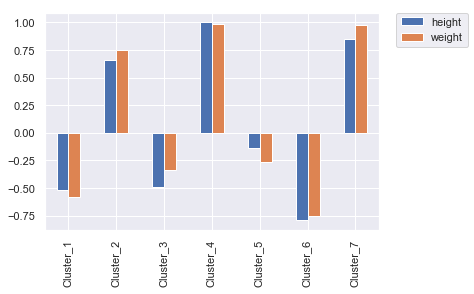

In [552]:
_10s_cluster = _10s_idx7
_10s_z = pd.DataFrame(_10s_z)
_10s_z.index = _10s.index
_10s_z.columns = _10s.columns

##Add the cluster membership to first dataframe x
_10s_z['cluster_ID'] = _10s_cluster[:]
_10s_z_cluster_sort = _10s_z.sort_values('cluster_ID')

## Sort the players by cluster membership
cluster1 = _10s_z_cluster_sort.loc[_10s_z_cluster_sort["cluster_ID"] == 0]
cluster2 = _10s_z_cluster_sort.loc[_10s_z_cluster_sort["cluster_ID"] == 1]
cluster3 = _10s_z_cluster_sort.loc[_10s_z_cluster_sort["cluster_ID"] == 2]
cluster4 = _10s_z_cluster_sort.loc[_10s_z_cluster_sort["cluster_ID"] == 3]
cluster5 = _10s_z_cluster_sort.loc[_10s_z_cluster_sort["cluster_ID"] == 4]
cluster6 = _10s_z_cluster_sort.loc[_10s_z_cluster_sort["cluster_ID"] == 5]
cluster7 = _10s_z_cluster_sort.loc[_10s_z_cluster_sort["cluster_ID"] == 6]

#calculate mean values for each clusters
c1means = pd.DataFrame(cluster1.mean())
c2means = pd.DataFrame(cluster2.mean())
c3means = pd.DataFrame(cluster3.mean())
c4means = pd.DataFrame(cluster4.mean())
c5means = pd.DataFrame(cluster5.mean())
c6means = pd.DataFrame(cluster6.mean())
c7means = pd.DataFrame(cluster7.mean())

summary = pd.concat([c1means, c2means, c3means, c4means, c5means, c6means, c7means], axis=1, join_axes = [c1means.index])
 
## Assign column names to the dataframe summary
summary.columns = ['Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5', 'Cluster_6', 'Cluster_7']

summary_feature1 = summary.loc[['height','weight']]
summary_feature1 = summary_feature1.transpose()
plt.figure()
summary_feature1.plot(kind ='bar')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) ## to move the legend outside of plot
plt.show()

#### large players: Cluster_2, Cluster_4, Cluster_7
#### medium players: Cluster_5
#### small players: Cluster_1, Cluster_3, Cluster_6

In [553]:
summary_feature2 = summary.loc[['PTS','AST','TRB','STL','BLK','PF']]
summary_feature2 = summary_feature2.transpose()

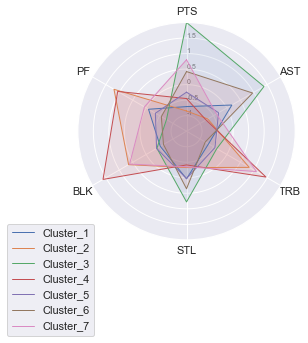

In [554]:
from math import pi

# ------- PART 1: Create background
 
# number of variable
categories=list(summary_feature2)[0:]
N = len(categories) 
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([-1,-0.5,0,0.5,1,1.5], ["-1","-0.5","0","0.5","1","1.5"], color="grey", size=7)
plt.ylim(-1.5,2.0)
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=summary_feature2.loc['Cluster_1'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_1")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=summary_feature2.loc['Cluster_2'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_2")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=summary_feature2.loc['Cluster_3'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_3")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind4
values=summary_feature2.loc['Cluster_4'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_4")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind5
values=summary_feature2.loc['Cluster_5'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_5")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind6
values=summary_feature2.loc['Cluster_6'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_6")
ax.fill(angles, values, 'r', alpha=0.1)

 
# Ind7
values=summary_feature2.loc['Cluster_7'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_7")
ax.fill(angles, values, 'r', alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

#### Cluster_7: big players well-rounded in all areas
#### Cluster_3: small players particularly strong in scoring, assisting and stealing
#### Cluster_2: big players particularly strong in rebounding and blocking, and and also getting fouls
#### Cluster_4: big players exceptionaly strong in rebounding and blocking
#### Cluster_6: small players relatively strong in assisting and stealing
#### Cluster_1: small players average in all areas
#### Cluster_5: medium players average in all areas

In [555]:
summary_feature3 = summary.loc[['2P','2P%','3P','3P%','FT','FT%']]
summary_feature3 = summary_feature3.transpose()

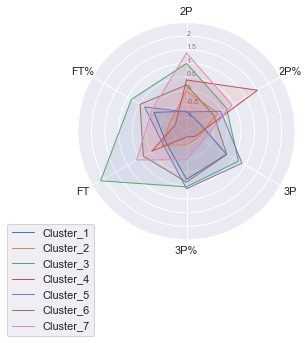

In [556]:
from math import pi

# ------- PART 1: Create background
 
# number of variable
categories=list(summary_feature3)[0:]
N = len(categories) 
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([-1,-0.5,0,0.5,1,1.5,2], ["-1","-0.5","0","0.5","1","1.5","2"], color="grey", size=7)
plt.ylim(-1.5,2.5)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=summary_feature3.loc['Cluster_1'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_1")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=summary_feature3.loc['Cluster_2'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_2")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=summary_feature3.loc['Cluster_3'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_3")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind4
values=summary_feature3.loc['Cluster_4'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_4")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind5
values=summary_feature3.loc['Cluster_5'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_5")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind6
values=summary_feature3.loc['Cluster_6'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_6")
ax.fill(angles, values, 'r', alpha=0.1)

 
# Ind7
values=summary_feature3.loc['Cluster_7'].values.tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster_7")
ax.fill(angles, values, 'r', alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

#### Cluster_7: big players who shoot mid-range and free throw often, well-rounded in all areas
#### Cluster_3: small players who's exceptionally strong in all kinds of shooting, assisting and stealing
#### Cluster_2: big players who don't shoot much, but particularly strong in rebounding and blocking, and and also getting fouls
#### Cluster_4: big players have good under basket shoots, bad at free throws, exceptionaly strong in rebounding and blocking
#### Cluster_6: small players have well rounded shooting options, relatively strong in assisting and stealing
#### Cluster_1: small players focus more on three points shooting, average in all areas
#### Cluster_5: medium players who focus more on three points shooting, average in all areas

### Inteprate through unnormalized dataset

In [557]:
_10s_cluster = _10s_idx7
_10s_all['cluster_ID'] = _10s_cluster[:]
_10s_all_cluster_sort = _10s_all.sort_values('cluster_ID')

cluster1 = _10s_all_cluster_sort.loc[_10s_all_cluster_sort["cluster_ID"] == 0]
cluster2 = _10s_all_cluster_sort.loc[_10s_all_cluster_sort["cluster_ID"] == 1]
cluster3 = _10s_all_cluster_sort.loc[_10s_all_cluster_sort["cluster_ID"] == 2]
cluster4 = _10s_all_cluster_sort.loc[_10s_all_cluster_sort["cluster_ID"] == 3]
cluster5 = _10s_all_cluster_sort.loc[_10s_all_cluster_sort["cluster_ID"] == 4]
cluster6 = _10s_all_cluster_sort.loc[_10s_all_cluster_sort["cluster_ID"] == 5]
cluster7 = _10s_all_cluster_sort.loc[_10s_all_cluster_sort["cluster_ID"] == 6]

#calculate mean values for each clusters
c1means = pd.DataFrame(cluster1.mean())
c2means = pd.DataFrame(cluster2.mean())
c3means = pd.DataFrame(cluster3.mean())
c4means = pd.DataFrame(cluster4.mean())
c5means = pd.DataFrame(cluster5.mean())
c6means = pd.DataFrame(cluster6.mean())
c7means = pd.DataFrame(cluster7.mean())

##Concatenate the three dataframes along axis =1 using the index from c1means
summary = pd.concat([c1means, c2means, c3means, c4means, c5means, c6means, c7means], axis=1, join_axes = [c1means.index])

## Assign column names to the dataframe summary
summary.columns = ['Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5', 'Cluster_6', 'Cluster_7']
print(summary)

                 Cluster_1     Cluster_2     Cluster_3     Cluster_4  \
Unnamed: 0    14124.746193  13666.398714  14194.413793  14093.038328   
Unnamed: 0.1  22554.390863  21768.366559  22673.706897  22498.585366   
Year           2013.928934   2012.633441   2014.114943   2013.888502   
Age              26.413706     26.205788     27.178161     26.313589   
G                56.406091     60.469453     70.379310     66.327526   
MP              992.771574   1083.189711   2401.241379   1434.254355   
PER               0.393951      0.457977      0.350532      0.497141   
TS%               0.480784      0.501801      0.575115      0.588631   
3PAr              0.375297      0.052492      0.286218      0.018174   
FTr               0.196975      0.310322      0.381983      0.447066   
ORB%              2.652538      9.222186      2.966092     11.445993   
DRB%             11.078426     18.697106     13.430460     21.810801   
TRB%              6.845685     13.927653      8.277011     16.65

/Users/yidingweng/anaconda3/envs/ai/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Extra things to notice for each cluster:

#### Cluster_4: one of the groups that are tallest and heaviest
#### Cluster_3: one of the group played longest time, has the highest USG%(usage rate)
#### Cluster_7: one of the groups that are tallest and heaviest
#### Cluster_1: G(games played) and MP(minutes played) is signifcantly lower than other clusters

### Observation so far for post 2010s players

#### Cluster_7: big players who shoot mid-range and free throw often, well-rounded in all areas
#### Cluster_3: small players who's exceptionally strong in all kinds of shooting, assisting and stealing, have highest usage
#### Cluster_2: big players who don't shoot much, but particularly strong in rebounding and blocking, and and also getting fouls
#### Cluster_4: big players have good under basket shoots, bad at free throws, exceptionaly strong in rebounding and blocking
#### Cluster_6: small players have well rounded shooting options, relatively strong in assisting and stealing
#### Cluster_1: small players focus more on three points shooting, average in all areas, less game time compare to other groups
#### Cluster_5: medium players who focus more on three points shooting, average in all areas

## Who are in each clusters

As before we try to understand the character of each cluster by selecting prominent players in each cluster. 

### Big man with all traits

In [559]:
cluster7.loc[cluster7['MP'] >= 2500]['Player'].unique()

array(['LaMarcus Aldridge', 'Andrea Bargnani', 'Luol Deng', 'Chris Bosh',
       'Karl-Anthony Towns', 'Zach Randolph', 'Carlos Boozer',
       'Chris Kaman', 'Brook Lopez', 'David Lee', 'Dirk Nowitzki',
       'Lamar Odom', 'Myles Turner', 'Gerald Wallace', 'Hassan Whiteside',
       'David West', 'Luis Scola', 'Al Horford', 'Josh Smith',
       "Amar'e Stoudemire", 'Al Jefferson', 'Greg Monroe', 'Pau Gasol',
       'Marc Gasol', 'Blake Griffin', 'Kevin Love', 'Marcin Gortat',
       'Serge Ibaka', 'Joakim Noah', 'Tristan Thompson', 'Nikola Vucevic',
       'Giannis Antetokounmpo', 'Thaddeus Young', 'Paul Millsap',
       'Gorgui Dieng', 'Anthony Davis', 'Elton Brand', 'Andre Drummond'], dtype=object)

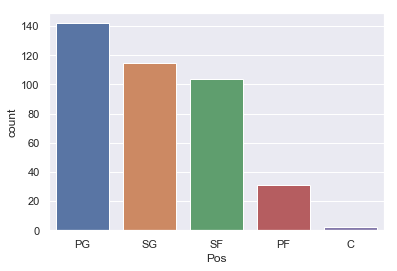

In [560]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Pos", data=cluster1, order=["PG", "SG", "SF","PF","C"])

### Elite player who carries the team

In [562]:
cluster3.loc[cluster3['MP'] >= 2500]['Player'].unique()

array(['Jeff Teague', 'Russell Westbrook', 'Damian Lillard',
       'LeBron James', 'Kobe Bryant', 'James Harden', 'Carmelo Anthony',
       'Kemba Walker', 'Giannis Antetokounmpo', 'Rudy Gay', 'Kevin Durant',
       'John Wall', 'Bradley Beal', 'Paul George', 'Jimmy Butler',
       'DeMar DeRozan', 'Marc Gasol', 'Dirk Nowitzki', 'Paul Pierce',
       'Kevin Love', 'Kyle Lowry', 'Deron Williams', 'Chris Paul',
       'Stephen Curry', 'Eric Bledsoe', 'Derrick Rose', 'Dwyane Wade',
       'C.J. McCollum', 'Tony Parker', 'Gordon Hayward', 'Isaiah Thomas',
       'Danny Granger', 'Goran Dragic', 'Draymond Green', 'Kyrie Irving',
       'Steve Nash', 'Kevin Martin', 'Klay Thompson'], dtype=object)

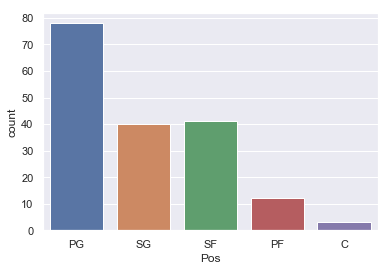

In [563]:
ax = sns.countplot(x="Pos", data=cluster3,order=["PG", "SG", "SF","PF","C"])

### Big Defensive inside

In [569]:
cluster2.loc[cluster2['MP'] >= 1800]['Player'].unique()

array(['Kendrick Perkins', 'Markieff Morris', 'Roy Hibbert', 'Luc Mbah',
       'Tyler Zeller', 'Brad Miller', 'Bismack Biyombo', 'Jerami Grant',
       'Dante Cunningham', 'Nerlens Noel', 'Joakim Noah', 'Brandon Bass',
       'Al-Farouq Aminu', 'Tony Allen', 'Jason Thompson', 'Spencer Hawes',
       'Michael Kidd-Gilchrist', 'Kenyon Martin', 'Taj Gibson',
       'Jonas Jerebko', 'Alex Len', 'Samuel Dalembert',
       'Giannis Antetokounmpo'], dtype=object)

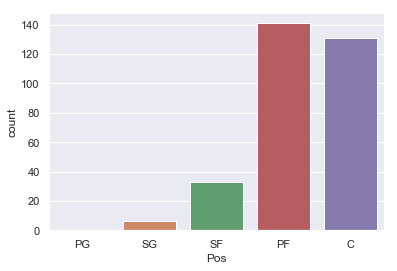

In [570]:
ax = sns.countplot(x="Pos", data=cluster2,order=["PG", "SG", "SF","PF","C"])

### Under basket offender, ring protector

In [573]:
cluster4.loc[cluster4['MP'] >= 1900]['Player'].unique()

array(['Rudy Gobert', 'Amir Johnson', 'Robin Lopez', 'Andre Drummond',
       'Nene Hilario', 'Gorgui Dieng', 'Tiago Splitter', 'Brendan Haywood',
       'DeAndre Jordan', 'Tyson Chandler', 'Larry Sanders',
       'Tristan Thompson', 'Samuel Dalembert', 'Dwight Howard',
       'Mason Plumlee', 'Jonas Valanciunas', 'Serge Ibaka', 'Joakim Noah',
       'Marcin Gortat', 'Miles Plumlee', 'Reggie Evans', 'Kenneth Faried',
       'Marc Gasol', 'Omer Asik', 'Timofey Mozgov', 'JaMychal Green',
       'Taj Gibson', 'Chuck Hayes', 'Kris Humphries', 'Zaza Pachulia',
       'Steven Adams', 'Hassan Whiteside', 'JaVale McGee', 'Emeka Okafor',
       'Greg Monroe', 'Andrew Bogut', 'Anderson Varejao',
       'Kendrick Perkins', 'Ben Wallace'], dtype=object)

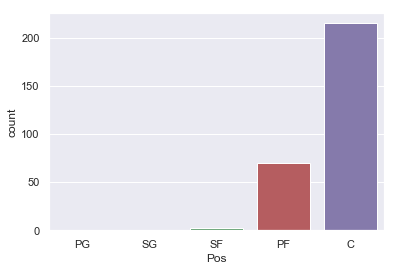

In [575]:
ax = sns.countplot(x="Pos", data=cluster4,order=["PG", "SG", "SF","PF","C"])

### Outside assistent

In [579]:
cluster6.loc[cluster6['MP'] >= 2600]['Player'].unique()

array(['Monta Ellis', 'Khris Middleton', 'C.J. McCollum', 'Beno Udrih',
       'Trevor Ariza', 'John Wall', 'D.J. Augustin', 'Thaddeus Young',
       'O.J. Mayo', 'Kemba Walker', 'Rajon Rondo', 'Mike Conley',
       'Gordon Hayward', 'Jrue Holiday', 'Devin Booker', 'Nicolas Batum',
       'DeMar DeRozan', 'Harrison Barnes', 'Andrew Wiggins',
       'Brandon Jennings', 'Russell Westbrook', 'Andre Miller',
       'Josh Smith', 'John Salmons', 'Derrick Rose', 'Jeff Green',
       'Ricky Rubio', 'Wesley Matthews', 'Luol Deng', 'Raymond Felton',
       'Andre Iguodala', 'Jeremy Lin', 'Damian Lillard', 'Stephen Jackson',
       'Tyreke Evans', 'J.R. Smith', 'Rudy Gay', 'Ty Lawson',
       'Jeff Teague', 'Paul George', 'Joe Johnson', 'Greivis Vasquez',
       'Evan Turner', 'Aaron Brooks', 'Stephen Curry'], dtype=object)

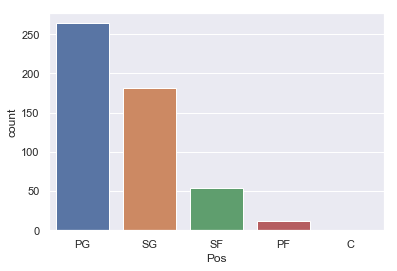

In [580]:
ax = sns.countplot(x="Pos", data=cluster6,order=["PG", "SG", "SF","PF","C"])

### Secondary ball handler, 3-point shooter

In [587]:
cluster1.loc[cluster1['MP'] >= 1500]['Player'].unique()

array(['Joe Johnson', 'Stanley Johnson', 'Emmanuel Mudiay', 'Earl Watson',
       'Corey Brewer', 'Marco Belinelli', 'Randy Foye', 'D.J. Augustin',
       'Monta Ellis', 'Matthew Dellavedova', 'Steve Blake',
       'Travis Outlaw', 'Dion Waiters', 'Nik Stauskas', 'Norris Cole',
       'Dante Exum', 'Tayshaun Prince', 'Ben McLemore', 'Kendall Marshall',
       "E'Twaun Moore", 'Lance Stephenson', 'Michael Beasley',
       'Iman Shumpert', 'Kirk Hinrich', 'Luc Mbah', 'Shane Larkin',
       'Terrence Williams', 'Derek Fisher', 'Charlie Bell',
       'Brandon Jennings', 'Brandon Ingram', 'Jeff Green',
       'Domantas Sabonis', 'Isaiah Whitehead', 'Evan Turner',
       'Sergio Rodriguez', 'Tim Frazier', 'Chris Duhon'], dtype=object)

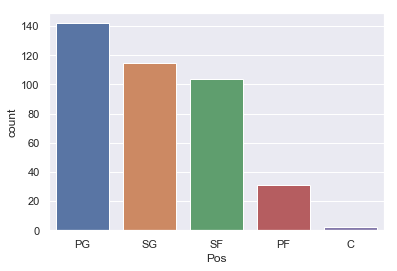

In [588]:
ax = sns.countplot(x="Pos", data=cluster1, order=["PG", "SG", "SF","PF","C"])

### 3-point shooter, outside defender

In [595]:
cluster5.loc[cluster5['MP'] >= 2400]['Player'].unique()

array(['Avery Bradley', 'Arron Afflalo', 'Klay Thompson', 'Trevor Ariza',
       'Chandler Parsons', 'Kentavious Caldwell-Pope', 'Jodie Meeks',
       'Khris Middleton', 'P.J. Tucker', 'Tobias Harris', 'Draymond Green',
       'J.R. Smith', 'Lance Stephenson', 'Ben McLemore', 'Wesley Matthews',
       'Joe Johnson', 'Otto Porter', 'Kyle Korver', 'J.J. Redick',
       'Marcus Morris', 'Luol Deng', 'Wilson Chandler', 'Courtney Lee',
       'Evan Fournier', 'Rodney Hood', 'George Hill', 'Gary Harris',
       'Jason Kidd', 'Richard Jefferson', 'Ryan Anderson', 'Nicolas Batum',
       'Boris Diaw', 'Grant Hill', 'Alonzo Gee', 'Jeff Green',
       'Danilo Gallinari', 'Landry Fields', 'Channing Frye', 'Metta World',
       'Marvin Williams', 'Dorell Wright', 'Brandon Rush',
       'Jason Richardson', 'Ray Allen', 'Corey Brewer', 'Jimmy Butler',
       'Randy Foye', 'Mike Dunleavy', 'Rasual Butler', 'Jose Calderon',
       'Tayshaun Prince', 'Shawn Marion'], dtype=object)

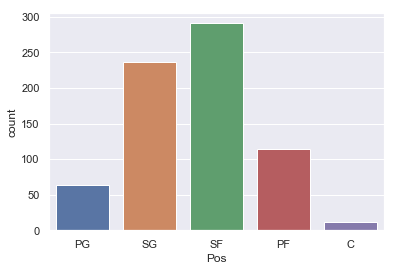

In [596]:
ax = sns.countplot(x="Pos", data=cluster5, order=["PG", "SG", "SF","PF","C"])